# CREDIT CARD FRUAD DETECTION

Description of DATASET:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Inspiration

Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

This dataset is taken from the Kaggle competition webpage.

In this project i will be building ML models to detect the fraudulant credit card transactions using different methods.


In [1]:
#Importing the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv',sep=',')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Except the Class column other values are of data type float. So transformation of variable are not required in this case.

# Exploratory Data Analysis

In [5]:
df.shape

(284807, 31)

In [6]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

The dataset is highly imbalanced. Most of the transactions are Actual transactions. And the proportion of the fradulant
transaction is less than 1%.

In [7]:
#For plotting purpose seperating fruad and actual transactions.
df_actual = df[df.Class ==0]
df_fraud = df[df.Class == 1]

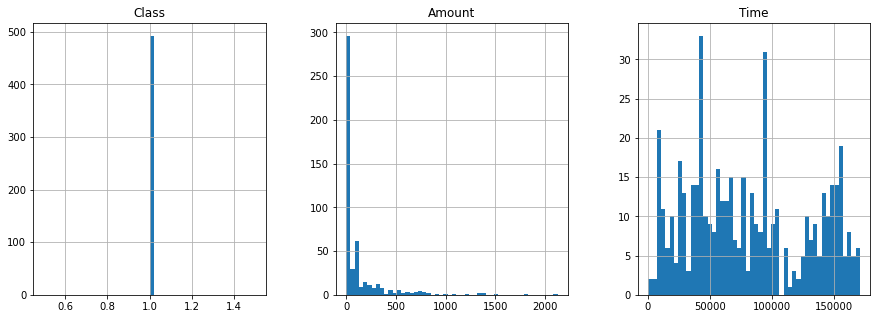

In [8]:
df_fraud[['Class','Amount', 'Time']].hist(bins=50, figsize=(15,5),layout=(1,3)); #Histogram of all the attributes


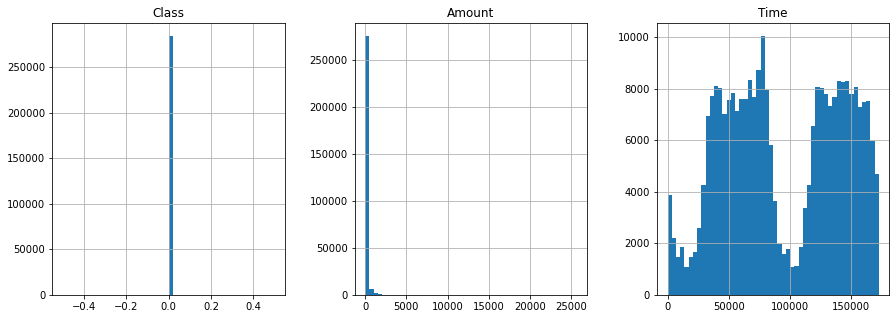

In [9]:
df_actual[['Class','Amount', 'Time']].hist(bins=50, figsize=(15,5),layout=(1,3)); #Histogram of all the attributes


From the above plots it shows that, most of the transactions in the fraudulant cases are not costing higher amount. And the 
distribution of the times of transaction also indicates that it has happened all over the day. Where as the peaks of the 
transactions in the Actual case is during mid of the day. 

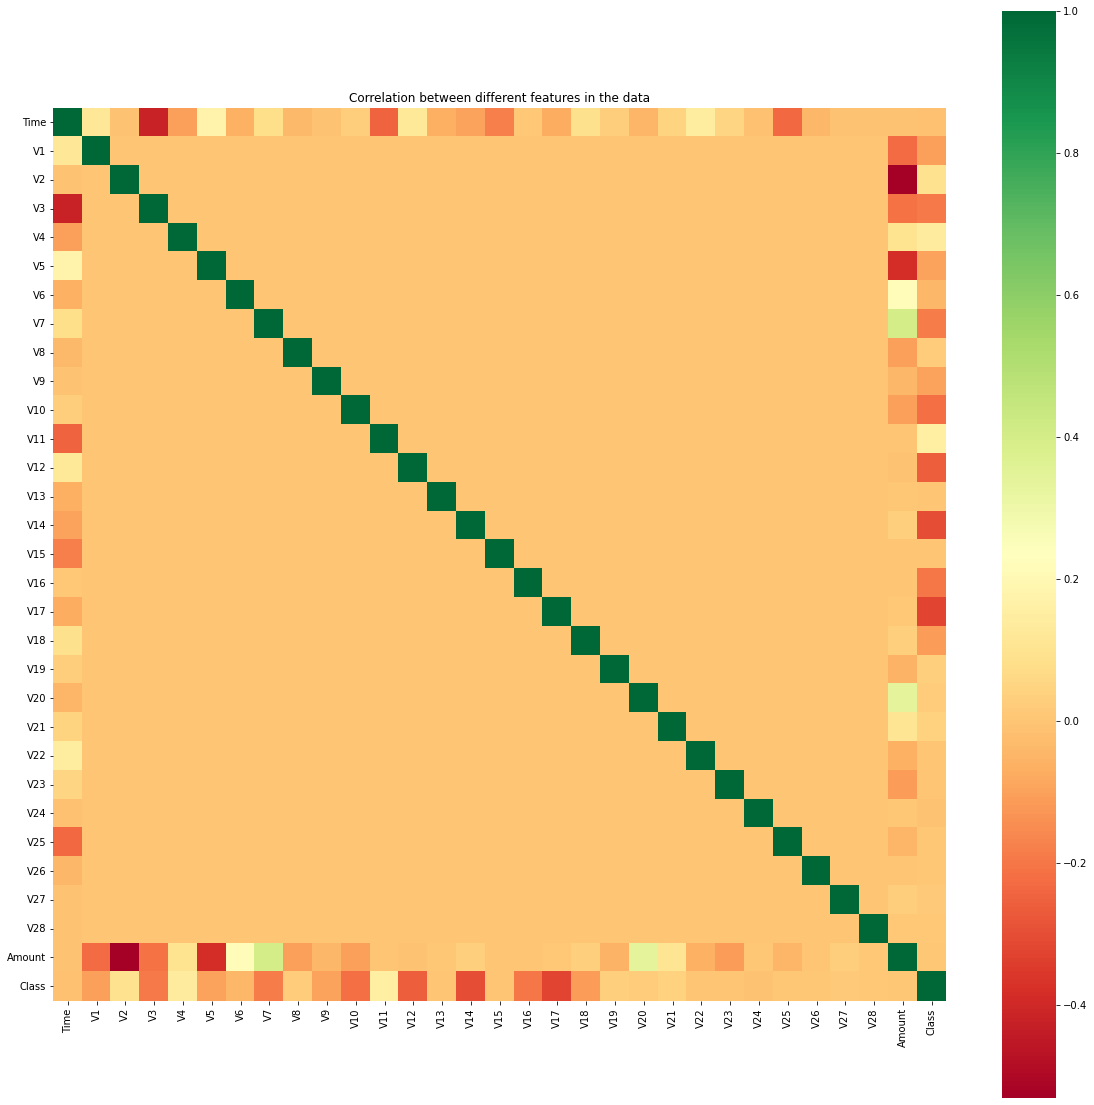

In [10]:
#heatmap to see the correlation among the features
plt.figure(figsize=(20,20))
#sns.set(font_scale=3)
sns.heatmap(df.corr(), vmax=1, square=True, annot=False,cmap='RdYlGn')
plt.title('Correlation between different features in the data')
plt.show()

It is evident from the heatmap analysis all the features are having different level of correlation 
to the Class variable. 

In the model building part i am going to try three differenct methods since the dataset is highly imbalanced.
1. With under or over sample the prominant and non - prominant class variable

In [11]:
#Model building with up and down sampling the data and applying the LogisticRegression Classifier to detect the transaction class.
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
#from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

In [12]:
X = df.drop('Class', axis=1)
y = df.Class

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34) # setting up testing and training sets


In [14]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
168106,119067.0,2.206319,-1.761390,-0.144431,-1.564487,-1.856767,-0.009137,-1.892984,0.129377,-0.487915,...,-0.112561,0.071370,0.339898,0.522653,-0.552968,-0.253635,0.050131,-0.021078,40.95,0
164327,116640.0,-0.007410,-0.458842,-0.218989,-1.062328,-1.596995,0.633407,1.223005,-0.447868,-3.375864,...,-0.162748,0.009690,0.302630,0.780151,-0.593759,0.032693,0.203293,0.099218,335.00,0
155047,104240.0,1.985079,0.279770,-1.649709,1.381290,0.528321,-1.126888,0.535453,-0.368885,1.096456,...,0.025640,0.299648,0.007740,-0.084324,0.336553,-0.539052,-0.072206,-0.080267,19.99,0
240957,150821.0,-0.543409,0.353994,0.037848,0.361079,-0.219968,-0.453677,0.369822,0.305862,0.473443,...,-0.194253,-0.422907,0.151072,0.011148,-0.792353,0.035118,-0.098290,-0.013546,70.42,0
126278,77974.0,1.222233,-0.502938,1.000396,-0.626600,-1.569995,-1.065344,-0.718350,0.073763,2.139948,...,-0.016790,0.089962,0.031662,0.674008,0.380499,-0.699251,0.079357,0.033766,1.00,0


In [15]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
##Upsampling
from sklearn.utils import resample

actual = X[X.Class==0]
fraud = X[X.Class==1]

# upsample fraud Class
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(actual), # match number in majority class
                          random_state=34) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([actual, fraud_upsampled])

# checking the distribution of the Class variable
upsampled.Class.value_counts()

0    199030
1    199030
Name: Class, dtype: int64

In [17]:
# Now the dataset is balanced so applying Logistic regression model 

from sklearn.linear_model import LogisticRegression

y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [18]:
accuracy_score(y_test, upsampled_pred)


0.9784768793230575

In [19]:
from sklearn.metrics import classification_report

print('LR classification_report - UpSampled Data')
print(classification_report(y_test,upsampled_pred))

LR classification_report - UpSampled Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85285
           1       0.07      0.87      0.13       158

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [20]:
# Since the data is balanced now we can check the Confustion matrix

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,83466,1819
1,20,138


In [21]:
# DownSampling the majority class to the equivalent of Minority Class (Fraud):
actual_downsampled = resample(actual,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 34) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([actual_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

0    334
1    334
Name: Class, dtype: int64

In [22]:
y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

downsampled_model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
downsampled_pred = downsampled_model.predict(X_test)
accuracy_score(y_test, downsampled_pred)


0.9718408763737229

In [23]:
print('LR classification_report - DownSampled Data')
print(classification_report(y_test,downsampled_pred))

LR classification_report - DownSampled Data
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85285
           1       0.06      0.88      0.10       158

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [24]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, downsampled_pred))

,0,1
0,82898,2387
1,19,139


In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.9777395456620203

In [26]:
print('RandomForest classification_report - DownSampled Data')
print(classification_report(y_test,rfc_pred))

RandomForest classification_report - DownSampled Data
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85285
           1       0.07      0.87      0.13       158

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [27]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, rfc_pred))


,0,1
0,83403,1882
1,20,138


In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

gnb_pred = gnb_model.predict(X_test)
accuracy_score(y_test, gnb_pred)

0.9863651791252648

In [29]:
print('Gaussion NB classification_report - DownSampled Data')
print(classification_report(y_test,gnb_pred))

Gaussion NB classification_report - DownSampled Data
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85285
           1       0.09      0.74      0.17       158

    accuracy                           0.99     85443
   macro avg       0.55      0.86      0.58     85443
weighted avg       1.00      0.99      0.99     85443



In [30]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, gnb_pred))

,0,1
0,84161,1124
1,41,117


In [31]:
## SVC with GridSearch CV
from sklearn import svm

#Hyperparamters
C = [1,2,3]
gamma_val = [0.001, 0.01, 0.1]
param_grid = dict(C=C, gamma=gamma_val)

svm_model = svm.SVC(kernel='rbf', probability=True)
svm_grid = GridSearchCV(svm_model, param_grid, cv=5, scoring='roc_auc', verbose=10, n_jobs=-1)
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'gamma': [0.001, 0.01, 0.1]},
             scoring='roc_auc', verbose=10)

In [32]:
grid_pred = svm_grid.predict(X_test)
accuracy_score(y_test, grid_pred)


0.9445478272064417

In [33]:
print('SVM - GS classification_report - DownSampled Data')
print(classification_report(y_test,grid_pred))

SVM - GS classification_report - DownSampled Data
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85285
           1       0.01      0.28      0.02       158

    accuracy                           0.94     85443
   macro avg       0.50      0.61      0.49     85443
weighted avg       1.00      0.94      0.97     85443



In [34]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, grid_pred))

,0,1
0,80661,4624
1,114,44


Plotting ROC-AUC Curves to check the performance of the models.

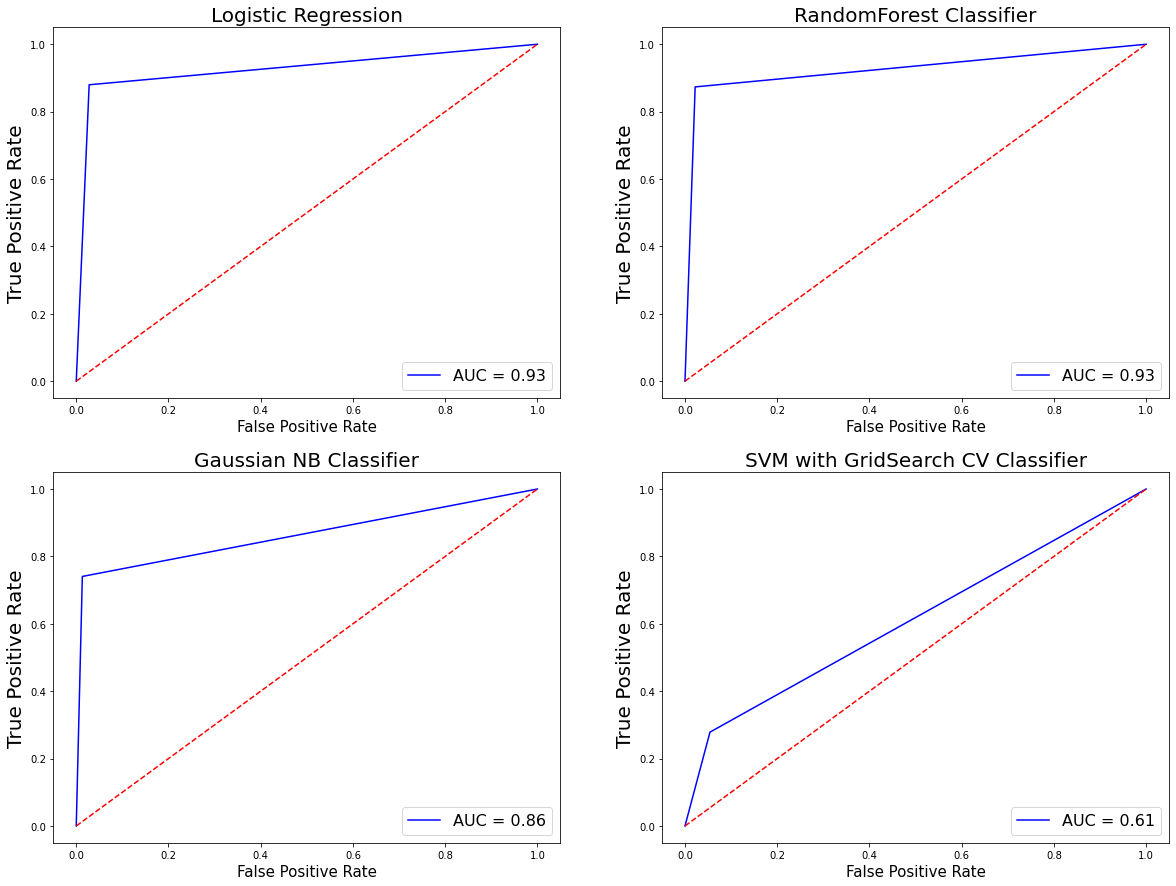

In [35]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

#=================Logistic Regression====================

downsampled_pred = downsampled_model.predict(X_test)
fprlr, tprlr, thresholdlr = metrics.roc_curve(y_test, downsampled_pred)
roc_auc_lr = metrics.auc(fprlr, tprlr)

ax[0,0].plot(fprlr, tprlr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
ax[0,0].plot([0, 1], [0, 1],'r--')
ax[0,0].set_title('Logistic Regression',fontsize=20)
ax[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax[0,0].legend(loc = 'lower right', prop={'size': 16})


#=================Random Forest Classifier ====================

rfc_pred = rfc.predict(X_test)
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, rfc_pred)
roc_auc_rfc = metrics.auc(fprrfc, tprrfc)

ax[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_auc_rfc)
ax[0,1].plot([0, 1], [0, 1],'r--')
ax[0,1].set_title('RandomForest Classifier',fontsize=20)
ax[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax[0,1].legend(loc = 'lower right', prop={'size': 16})

#================Gaussian NB ======================


gnb_pred = gnb_pred = gnb_model.predict(X_test)

fprgnb, tprgnb, thresholdgnb = metrics.roc_curve(y_test, gnb_pred)
roc_auc_gnb = metrics.auc(fprgnb, tprgnb)

ax[1,0].plot(fprgnb, tprgnb, 'b', label = 'AUC = %0.2f' % roc_auc_gnb)
ax[1,0].plot([0, 1], [0, 1],'r--')
ax[1,0].set_title('Gaussian NB Classifier',fontsize=20)
ax[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax[1,0].legend(loc = 'lower right', prop={'size': 16})

#================SVM with GridSearch CV ======================

grid_pred = svm_grid.predict(X_test)
fprsvm, tprsvm, thresholdsvm = metrics.roc_curve(y_test, grid_pred)
roc_auc_svm = metrics.auc(fprsvm, tprsvm)

ax[1,1].plot(fprsvm, tprsvm, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
ax[1,1].plot([0, 1], [0, 1],'r--')
ax[1,1].set_title('SVM with GridSearch CV Classifier',fontsize=20)
ax[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax[1,1].legend(loc = 'lower right', prop={'size': 16})







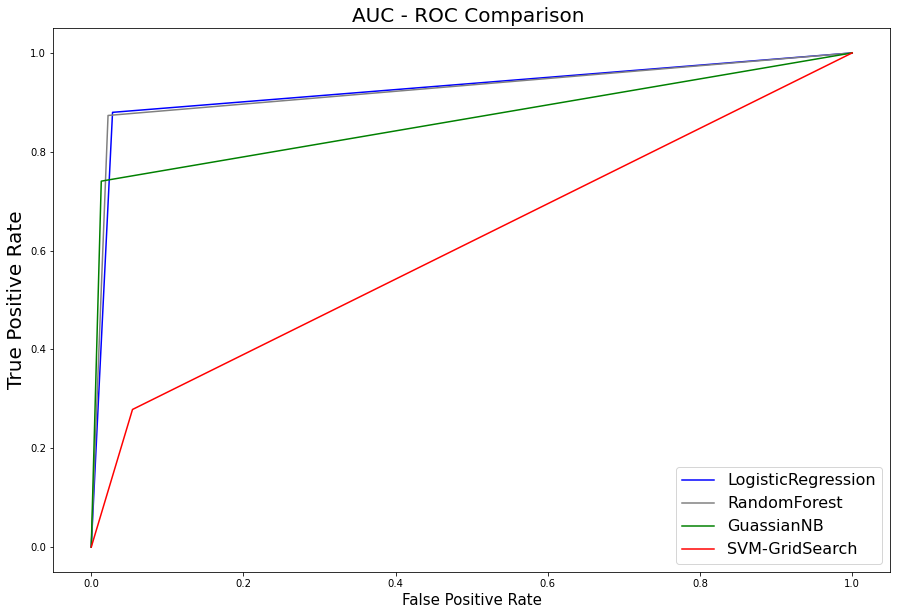

In [36]:
plt.figure(figsize=(15,10))
plt.plot(fprlr, tprlr, 'b', label = 'LogisticRegression', color='blue')
plt.plot(fprrfc, tprrfc, 'b', label = 'RandomForest', color='grey')
plt.plot(fprgnb, tprgnb, 'b', label = 'GuassianNB', color='green')
plt.plot(fprsvm,  tprsvm, 'b', label = 'SVM-GridSearch', color='red')
plt.title('AUC - ROC Comparison ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

In [37]:
#LogisticRegression and RandomForest Classifiers are performing better in the resampled data in comparison to other models.

In [38]:
#Method 2: In this method rather than taking the whole dataset only a fraction of the dataset is considered for the whole
#analysis 
#Credit : https://github.com/krishnaik06/Credit-Card-Fraudlent
    

In [39]:
## Take some sample of the data

df1= df.sample(frac = 0.1,random_state=34)
df1.shape

(28481, 31)

In [40]:
df1.Class.value_counts(normalize=True)

0    0.99842
1    0.00158
Name: Class, dtype: float64

In [41]:
#Determine the number of fraud and valid transactions in the dataset

fraud = df1[df1['Class']==1]

actual = df1[df1['Class']==0]

outlier_fraction = len(fraud)/float(len(actual))

In [42]:
X = df1.drop('Class', axis=1)
y = df1.Class

#Method 2:
In this method two methods are used for detecting the fraud transactions considered to be the anamolies in the dataset in
comparison to the actual transactions. 

### Isolation Forest Algorithm :
One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation. The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

### Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [43]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=34, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)}

In [44]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print("Classification Report :")
    print(classification_report(y,y_pred));

C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 63
Accuracy Score :
0.9977879990168884
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.30      0.31      0.31        45

    accuracy                           1.00     28481
   macro avg       0.65      0.65      0.65     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 91
Accuracy Score :
0.9968048874688389
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.00      0.00      0.00        45

    accuracy                           1.00     28481
   macro avg       0.50      0.50      0.50     28481
weighted avg       1.00      1.00      1.00     28481



In [45]:
#Method 3: Taking only the fraction of dataset equivalent to the no of fraud transactions ie 492 data points from the actual transactions.
#credit : https://colab.research.google.com/drive/1qCpe-NeBvmNT4DmgAT38-VsuN9WtZQ4d?usp=sharing

In [46]:
df_actual.shape, df_fraud.shape

((284315, 31), (492, 31))

In [47]:
df_actual = df_actual.sample(n=492)

In [48]:
df2 = pd.concat([df_actual, df_fraud], axis=0)

In [49]:
df2.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [50]:
#now the dataset is balanced.

In [51]:
X = df2.drop('Class', axis=1)
Y = df2.Class

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [54]:
#Building a simpler Logistic Regression model to evaluate the dataset.

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)


C:\Users\prabh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
# accuracy on training data
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [56]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9466327827191868


In [57]:
# accuracy on test data
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [58]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9137055837563451


In [59]:
print('LR Modified Classification_report - fraction Data')
print(classification_report(Y_test,X_test_prediction))

LR Modified Classification_report - fraction Data
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        99
           1       0.94      0.89      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



In [60]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_test, X_test_prediction))

,0,1
0,93,6
1,11,87


# Observation:

All the three methods are performing well for the imbalanced data sets with different modification approaches. 